<div class="markdown-google-sans">
  <h1>Добро пожаловать в Colab!</h1>
</div>

<!-- TODO(b/319266067) remove temporary advert after a few weeks. -->
<div class="markdown-google-sans">
  <h2>&#40;Новое&#41; Попробуйте Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


Уже знакомы с Colab? В этом видео рассказывается о функциях, которые вы могли пропустить: интерактивных таблицах, истории выполненного кода и палитре команд.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  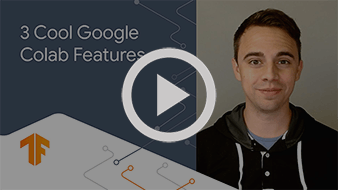
  </a>
</center>

<center>

Министерство науки и высшего образования Российской Федерации
Уфимский университет науки и технологий

Кафедра АСУ

Отчет по лабораторной работе №6
по дисциплине

Бизнес-аналитика и статистика

Тема работы "Частотный анализ числовых и текстовых данных"

Вариант задания 2

Выполнил
студент гр. ПИ-328
Безруков Н. А.

Проверил
проф. каф. АСУ
Арьков В. Ю.

Уфа
2024


# Титульный лист


<center>
Министерство науки и высшего образования Российской Федерации Уфимский университет науки и технологий

Кафедра АСУ

Отчет по лабораторной работе №6 по дисциплине

Бизнес-аналитика и статистика

Тема работы "Частотный анализ числовых и текстовых данных"

Вариант задания 2

Выполнил студент гр. ПИ-328 Безруков Н. А.

Проверил проф. каф. АСУ Арьков В. Ю.

Уфа 2024

# Генерируем числовые данные

In [ ]:
import numpy as np
from scipy.stats import norm

np.random.seed(123123)
mu = 100
sigma = 10
N = 10000
xx = np.linspace(60, 140, 100)
x = np.random.normal(mu, sigma, N)
x[:10]



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

n=20

sns.displot(x, kind='kde', bw_adjust=0.1)

plt.hist(x, bins=n, edgecolor='black', linewidth=2, facecolor='white', density=True, label='Гистограмма')
plt.plot(xx, norm.pdf(xx, loc=mu, scale=sigma))
plt.title('Нормальное распределение')
plt.legend()
plt.ylabel('Плотность вероятности')
plt.xlabel('Значение случайной величины')
plt.figure(figsize=(6, 2))
plt.text(x=20, y=0.033, s=f'$\mu$ = {mu}\n$\sigma$ = {sigma}')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

n=20
mu = 100
sigma = 10

plt.figure(figsize=(12, 6))
c_cum, x_cum, p_cum = plt.hist(x, bins=n, density=True, cumulative=True, color='white')
plt.plot(x_cum[1:], c_cum, color='black', linewidth=2, label='Кумулята', marker='o')
C = norm.cdf(xx, loc=mu, scale=sigma)
plt.title('Нормальное распределение')
plt.legend()
plt.ylabel('Накопленные частоты')
plt.xlabel('Значение случайной величины')
plt.text(x=63, y=0.5, s=f'$\mu$ = {mu}\n$\sigma$ = {sigma}')
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from google.colab import files
#uploaded = files.upload()
mask = np.array(Image.open('Безымянный.png'))
text = """Learningwhile funny main neural natural nenatural"""
wordcloud = WordCloud(width=1000, height=600, background_color='white', mask=mask).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
wordcloud.to_file('cloud.png')
dict_cloud = {'Funnta': 10, 'Nus': 20, 'lokki': 2, 'Sumdata': 12, 'Gorof': 90, 'taki': 1}
wordcloud = WordCloud(width=1000, height=600, background_color='white', mask=mask).generate_from_frequencies(dict_cloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

ff = open('/content/subs.txt', 'r', encoding='utf-8')
t1 = ff.read()
t2 = t1.replace('\n', ' ')
alpha = 'абвгдежзийклмнопрстуфхцчшщъыьэюя -,'

wordcloud = WordCloud(width=1000, height=600, background_color='white', mask=mask).generate(t2)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

wordcloud.to_file('cloud.png')

t2 = t2.split()
x1 = pd.DataFrame(t2)

freq = x1[0].value_counts()

x2 = pd.DataFrame({'Word': freq.index, 'Frequency': freq.values})
x3 = x2.sort_values(by='Word')
print(x3)
x4 = x3.Word.unique()
t3 = ' '.join(x for x in t2 if all(c in alpha for c in x))
print(t3)
c = (x for x in t1 if x in alpha)
list(c)[:5]

In [ ]:
import pymorphy2

tx = 'статистика статистику статистикой статистике статистикой статистиками'
print(tx)

tt_lem = ''
lemmatizer = pymorphy2.MorphAnalyzer(lang='ru')

words = tx.split()

for word in words:
    parsed_word = lemmatizer.parse(word)[0]
    normalized_word = parsed_word.normal_form
    tt_lem = tt_lem + ' ' + normalized_word

print(tt_lem.strip())


In [ ]:
import nltk
import pandas as pd
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('russian')
stop_words.append('итак')

pdx = pd.DataFrame(stop_words)
pdx.to_excel('stop_words.xlsx')

t_filt = ''
pd_stop_words = pd.read_excel('/content/srop_words_custom.xlsx', header=None)
my_stop_words = pd_stop_words.values.tolist()

my_stop_words = [word[0] for word in my_stop_words]

stop_words.extend(my_stop_words)

for word in t3.split():
    # t_filt = t_filt + word + ' '
    if word not in stop_words:
        t_filt = t_filt + word + ' '

print(t_filt)
wordcloud = WordCloud(width=1000, height=600, background_color='white', mask=mask).generate(t_filt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

pd_filt = pd.DataFrame(t_filt.split(' '), columns=['Word'])
freq = pd_filt.value_counts()
plt.figure(figsize=(10, 5))
freq[:30].plot.bar()
plt.xlabel('Слова')
plt.ylabel('Частота слов в тексте')
plt.title('ЛР 6')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ВалентинЮльевичАрьков Анализрядовдинамики вэлектронныхтаблицах Учебноепособие Издательские реше
ВалентинЮльевичАрьков Анализрядовдинамики вэлектронныхтаблицах Учебноепособие Издательские решения По лицензии Ridero 2020 УДК 004 ББК 32.973 А89 Шрифты предоставлены компанией «ПараТайп» Арьков Валентин Юльевич А89 Анализ рядов динамики электронных таблицах : Учебное пособие / Валентин Юльевич Арьков. [б. м.] : Издательские решения, 2020. 130 с. ISBN 978-5-4498-0461-7 В данной работе рассмотрим раздел «Динамика». Здесь изучают данные, привязанные ко времени. Мы будем опираться две предыдущие работы: «Анализ распределения (Сводка группировка)» «Анализ взаимосвязи (Корреляция регрессия)». Работа выполняется пакете типа электронных таблиц. Как предыдущих работах, вначале сгенерируем случайные числа поиграем ними, затем поработаем реальными данными. УДК 004 ББК 32.973 12+ В соответствии ФЗ 29.12.2010 №436-ФЗ ISBN 978-5-4498-0461-7 © Валентин Юльевич Арьков, 2020 ВВЕДЕНИЕ В данной работе ра

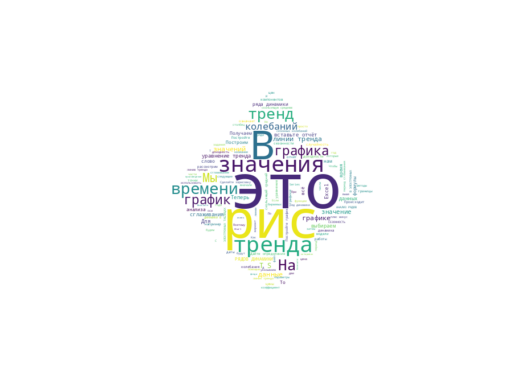

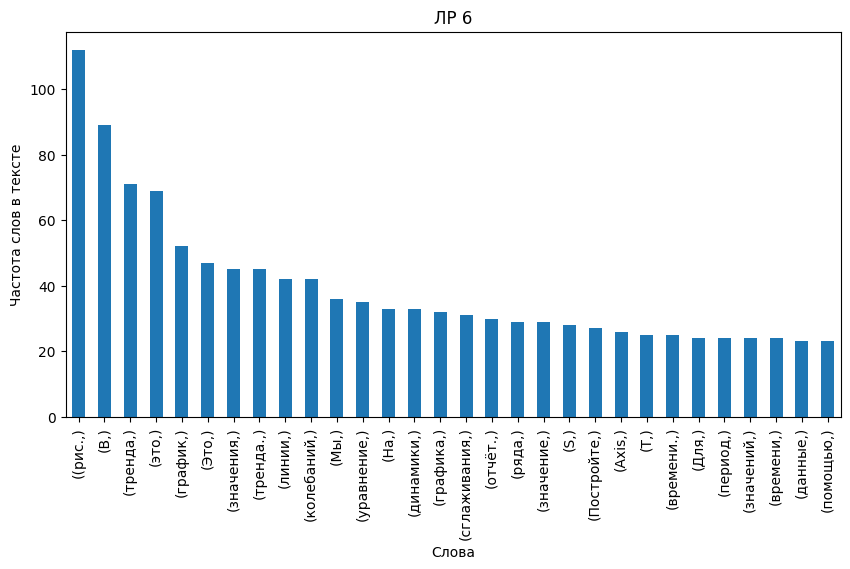

In [ ]:
import nltk
import pandas as pd
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('russian')
stop_words.append('итак')

pdx = pd.DataFrame(stop_words)
pdx.to_excel('stop_words_metodichka.xlsx')

t_filt = ''
pd_stop_words = pd.read_excel('/content/stop_words_metodichka_custom.xlsx', header=None)
my_stop_words = pd_stop_words.values.tolist()

my_stop_words = [word[0] for word in my_stop_words]

stop_words.extend(my_stop_words)

ff = open('/content/Методичка.txt', 'r')
ff_t = ff.read()
ff_t = ff_t.replace('\n', ' ')
print(ff_t[:100])

for word in ff_t.split():
    # t_filt = t_filt + word + ' '
    if word not in stop_words:
        t_filt = t_filt + word + ' '

print(t_filt)
wordcloud = WordCloud(width=1000, height=600, background_color='white', mask=mask).generate(t_filt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

pd_filt = pd.DataFrame(t_filt.split(' '), columns=['Word'])
freq = pd_filt.value_counts()
plt.figure(figsize=(10, 5))
freq[:30].plot.bar()
plt.xlabel('Слова')
plt.ylabel('Частота слов в тексте')
plt.title('ЛР 6')
plt.show()
